# Experiment 1

In-Context Learning

## TRC

不同的in-context length。

confusion matrix

## EMD

不同的in-context length。

结果

# Experiment 2

GPT embedding & last layer classification

In [1]:
import pandas as pd
from scripts.TRC import TRC_embedding

model_names = ["Adaboost", "DecisionTree", "GaussianProcess", "GradientBoosting", "KNN", 
               "LDA", "LogisticRegression", "NaiveBayes", "RandomForest", "SVM"]

## Expert Label

In [4]:
train_file = "./data/English/LREC_expert_label/train.csv"
test_file = "./data/English/LREC_expert_label/test.csv"
train_dat = pd.read_csv(train_file)
test_dat = pd.read_csv(test_file)

for model_name in model_names:
    confusion_matrix, classification_report, accuracy = TRC_embedding(model_name=model_name, train_dat=train_dat, test_dat=test_dat)
    print(model_name)
    print(confusion_matrix)
    print(classification_report)

[0 0 0 ... 1 1 1]
Adaboost
[[238  37]
 [ 43  94]]
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       275
           1       0.72      0.69      0.70       137

    accuracy                           0.81       412
   macro avg       0.78      0.78      0.78       412
weighted avg       0.80      0.81      0.80       412

[0 0 0 ... 1 1 1]
DecisionTree
[[221  54]
 [ 59  78]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       275
           1       0.59      0.57      0.58       137

    accuracy                           0.73       412
   macro avg       0.69      0.69      0.69       412
weighted avg       0.72      0.73      0.72       412

[0 0 0 ... 1 1 1]
GaussianProcess
[[253  22]
 [ 33 104]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       275
           1       0.83      0.76      0.79       137

    accuracy         

## BSC Label

In [ ]:
train_file = "./data/English/LREC_BSC/train.csv"
test_file = "./data/English/LREC_BSC/test.csv"
train_dat = pd.read_csv(train_file)
test_dat = pd.read_csv(test_file)

for model_name in model_names:
    confusion_matrix, classification_report = TRC_embedding(model_name=model_name, train_dat=train_dat, test_dat=test_dat)
    print(model_name)
    print(confusion_matrix)
    print(classification_report)

## mv Label

In [ ]:
train_file = "./data/English/LREC_mv/train.csv"
test_file = "./data/English/LREC_mv/test.csv"
train_dat = pd.read_csv(train_file)
test_dat = pd.read_csv(test_file)

for model_name in model_names:
    confusion_matrix, classification_report = TRC_embedding(model_name=model_name, train_dat=train_dat, test_dat=test_dat)
    print(model_name)
    print(confusion_matrix)
    print(classification_report)

We select Gaussian Process、Gradient Boost、Logistic Regression、SVM as further experimental learning model.

In [2]:
model_names = ["GaussianProcess", "GradientBoosting", "LogisticRegression", "SVM"]

## Balance Data

In [ ]:
sampling_methods = ["None", "SMOTEOver", "RandomOver", "RandomUnder", 
                    "ClusterUnder", "TomekUnder", "ENNUnder", "CNNUnder"]

train_file = "./data/English/LREC_BSC/train.csv"
test_file = "./data/English/LREC_BSC/test.csv"
train_dat = pd.read_csv(train_file)
test_dat = pd.read_csv(test_file)

for model_name in model_names:
    for sampling_method in sampling_methods:
        confusion_matrix, classification_report = TRC_embedding(model_name=model_name, train_dat=train_dat, test_dat=test_dat, 
                                                      sampling_method=sampling_method)
        print(model_name, sampling_method)
        print(confusion_matrix)
        print(classification_report)

看起来不太管用。

# Using Staistical Learning Method to make classification based on Embedding

In [3]:
from matplotlib import pyplot as plt


train_file = "./data/English/LREC_expert_label/train.csv"
test_file = "./data/English/LREC_expert_label/test.csv"
train_dat = pd.read_csv(train_file)
test_dat = pd.read_csv(test_file)
sample_sizes = [50, 100, 500, 1000, 2000, None]
model_accuracies = []

for model_name in model_names:
    accuracies = []
    for sample_size in sample_sizes:
        confusion_matrix, classification_report, accuracy = TRC_embedding(model_name=model_name, train_dat=train_dat, test_dat=test_dat, 
                                                      sampling_method="RandomOver", sample_size=sample_size)
        print(sample_size)
        print(model_name)
        print(confusion_matrix)
        accuracies.append(accuracy)
        print(classification_report)
    model_accuracies.append(accuracies)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定要使用的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.figure(figsize=(10, 6))
for i in range(len(model_names)):
    plt.plot(sample_sizes, model_accuracies[i], label=model_names[i])
plt.xlabel("样本量")
plt.ylabel("准确率")
plt.title("不同模型的准确率随样本量的变化")
plt.legend()
plt.grid(True)

plt.show()

50
50
GaussianProcess
[[142 133]
 [  5 132]]
              precision    recall  f1-score   support

           0       0.97      0.52      0.67       275
           1       0.50      0.96      0.66       137

    accuracy                           0.67       412
   macro avg       0.73      0.74      0.66       412
weighted avg       0.81      0.67      0.67       412

100
100
GaussianProcess
[[151 124]
 [  3 134]]
              precision    recall  f1-score   support

           0       0.98      0.55      0.70       275
           1       0.52      0.98      0.68       137

    accuracy                           0.69       412
   macro avg       0.75      0.76      0.69       412
weighted avg       0.83      0.69      0.70       412

500
500
GaussianProcess
[[167 108]
 [  6 131]]
              precision    recall  f1-score   support

           0       0.97      0.61      0.75       275
           1       0.55      0.96      0.70       137

    accuracy                           0.72

看起来50个样本已经有较好的效果了，但是50个样本有的时候会由于抽样的原因，导致结果不太稳定。

50
GaussianProcess
[[219  56]
 [ 38  99]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82       275
           1       0.64      0.72      0.68       137

    accuracy                           0.77       412
   macro avg       0.75      0.76      0.75       412
weighted avg       0.78      0.77      0.78       412

100
GaussianProcess
[[214  61]
 [ 24 113]]
              precision    recall  f1-score   support

           0       0.90      0.78      0.83       275
           1       0.65      0.82      0.73       137

    accuracy                           0.79       412
   macro avg       0.77      0.80      0.78       412
weighted avg       0.82      0.79      0.80       412

500
GaussianProcess
[[206  69]
 [ 10 127]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84       275
           1       0.65      0.93      0.76       137

    accuracy                           0.81       412


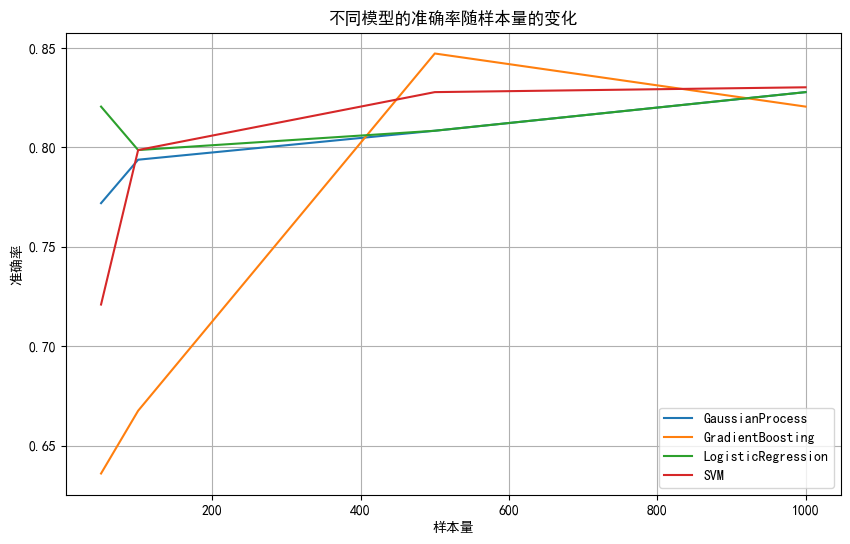

In [5]:
import random

from matplotlib import pyplot as plt


train_file = "./data/English/LREC_expert_label/train.csv"
test_file = "./data/English/LREC_expert_label/test.csv"
train_dat = pd.read_csv(train_file)
test_dat = pd.read_csv(test_file)
sample_sizes = [50, 100, 500, 1000, 2000, None]
model_accuracies = []

for model_name in model_names:
    accuracies = []
    for sample_size in sample_sizes:
        dat = train_dat.iloc[random.sample(range(len(train_dat)), sample_size)]
        confusion_matrix, classification_report, accuracy = TRC_embedding(model_name=model_name, train_dat=dat, test_dat=test_dat, 
                                                      sampling_method="RandomOver")
        print(sample_size)
        print(model_name)
        print(confusion_matrix)
        accuracies.append(accuracy)
        print(classification_report)
    model_accuracies.append(accuracies)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定要使用的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.figure(figsize=(10, 6))
for i in range(len(model_names)):
    plt.plot(sample_sizes, model_accuracies[i], label=model_names[i])
plt.xlabel("样本量")
plt.ylabel("准确率")
plt.title("不同模型的准确率随样本量的变化")
plt.legend()
plt.grid(True)

plt.show()

50
GaussianProcess
[[229  46]
 [ 42  95]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       275
           1       0.67      0.69      0.68       137

    accuracy                           0.79       412
   macro avg       0.76      0.76      0.76       412
weighted avg       0.79      0.79      0.79       412

100
GaussianProcess
[[195  80]
 [ 10 127]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       275
           1       0.61      0.93      0.74       137

    accuracy                           0.78       412
   macro avg       0.78      0.82      0.78       412
weighted avg       0.84      0.78      0.79       412

500
GaussianProcess
[[212  63]
 [ 14 123]]
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       275
           1       0.66      0.90      0.76       137

    accuracy                           0.81       412


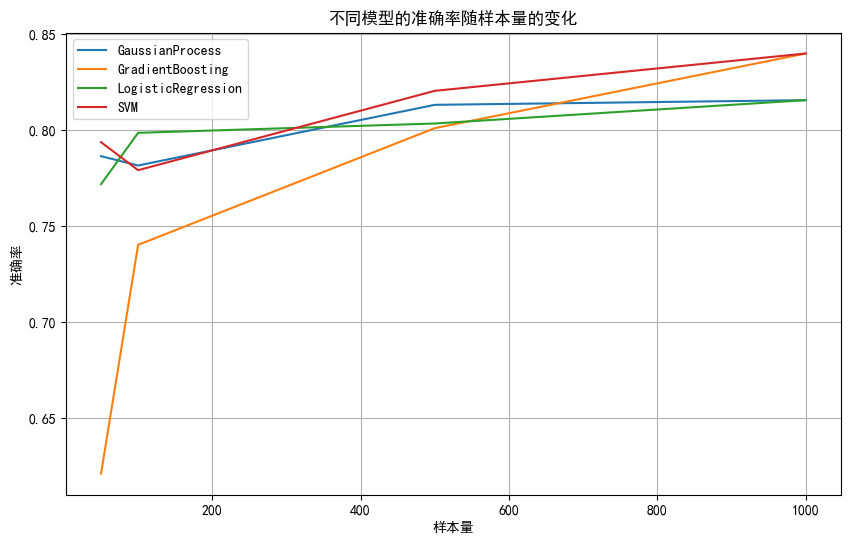

In [6]:
import random

from matplotlib import pyplot as plt


train_file = "./data/English/LREC_expert_label/train.csv"
test_file = "./data/English/LREC_expert_label/test.csv"
train_dat = pd.read_csv(train_file)
test_dat = pd.read_csv(test_file)
sample_sizes = [50, 100, 500, 1000, 2000]
model_accuracies = []

for model_name in model_names:
    accuracies = []
    for sample_size in sample_sizes:
        dat = train_dat.iloc[random.sample(range(len(train_dat)), sample_size)]
        confusion_matrix, classification_report, accuracy = TRC_embedding(model_name=model_name, train_dat=dat, test_dat=test_dat, 
                                                      sampling_method="RandomOver")
        print(sample_size)
        print(model_name)
        print(confusion_matrix)
        accuracies.append(accuracy)
        print(classification_report)
    model_accuracies.append(accuracies)

plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定要使用的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.figure(figsize=(10, 6))
for i in range(len(model_names)):
    plt.plot(sample_sizes, model_accuracies[i], label=model_names[i])
plt.xlabel("样本量")
plt.ylabel("准确率")
plt.title("不同模型的准确率随样本量的变化")
plt.legend()
plt.grid(True)

plt.show()